# CenterNet (Objects as Points) Object Detection Demo

This is a [CenterNet (Objects as Points)](https://arxiv.org/abs/1904.07850) colab notebook using [xingyizhou/CenterNet](https://github.com/xingyizhou/CenterNet).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CenterNet

In [0]:
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/xingyizhou/CenterNet.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # fix DCNv2
  !cd {project_name}/src/lib/models/networks && rm -rf DCNv2 && git clone https://github.com/CharlesShang/DCNv2.git && cd DCNv2 && ./make.sh
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt

import sys
sys.path.insert(0, join(project_name, 'src/lib'))
sys.path.append(join(project_name, 'src'))
# following 2 lines needed to avoid later import error
sys.path.append(join(project_name, 'src/lib/models/networks/DCNv2'))
from dcn_v2 import DCN

import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import clear_output

## Download a pretrained weight

We are going to use `ctdet_coco_dla_2x` which has 37.4 mAP.

In [0]:
model_name = 'ctdet_coco_dla_2x.pth'
if not exists(model_name):
  !pip install -q --upgrade gdown
  !gdown 'https://drive.google.com/uc?id=1pl_-ael8wERdUREEnaIfqOV_VF2bEVRT' # 37.4mAP

## Initialize CenterNet

In [0]:
from opts import opts
from detectors.detector_factory import detector_factory

# CenterNet opts want argv, so overwrite it
import sys
sys.argv = ['centernet', 'ctdet']
opt = opts().init()
opt.load_model = model_name
opt.debug = 1

Detector = detector_factory[opt.task]
detector = Detector(opt)


def imshow(title, bgr_img):
  plt.figure(figsize=(20,10))
  plt.imshow(bgr_img[:,:,::-1])

# patch cv2.imshow
import cv2
cv2.imshow = imshow

## Evaluate on a test image

We will test on an image already included in the repo `images/17790319373_bd19b24cfc_k.jpg`:

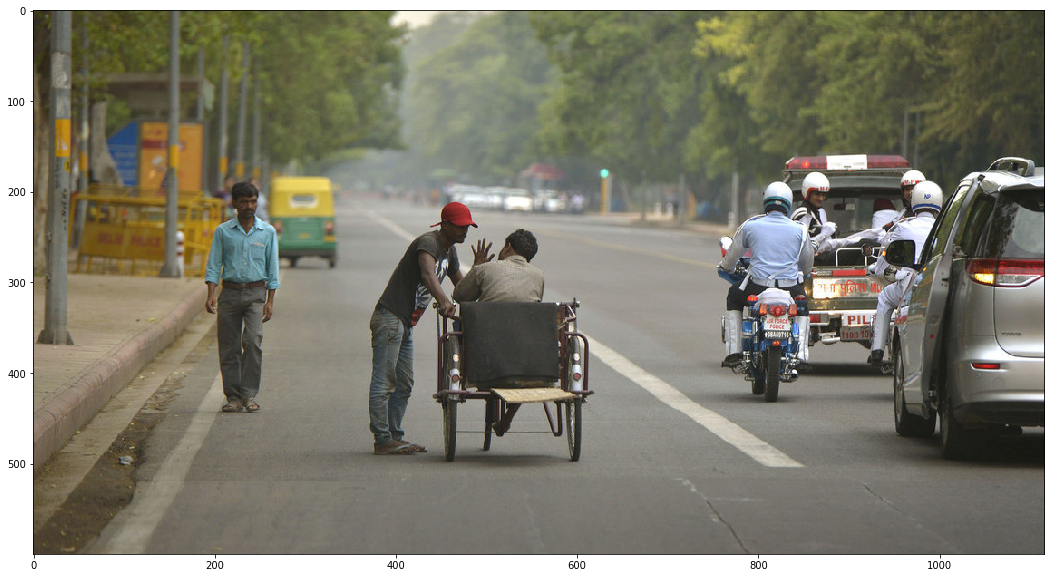

In [4]:
img = cv2.imread(join(project_name, 'images/17790319373_bd19b24cfc_k.jpg'))
imshow('', img)

Now, test the CenterNet on the above image:

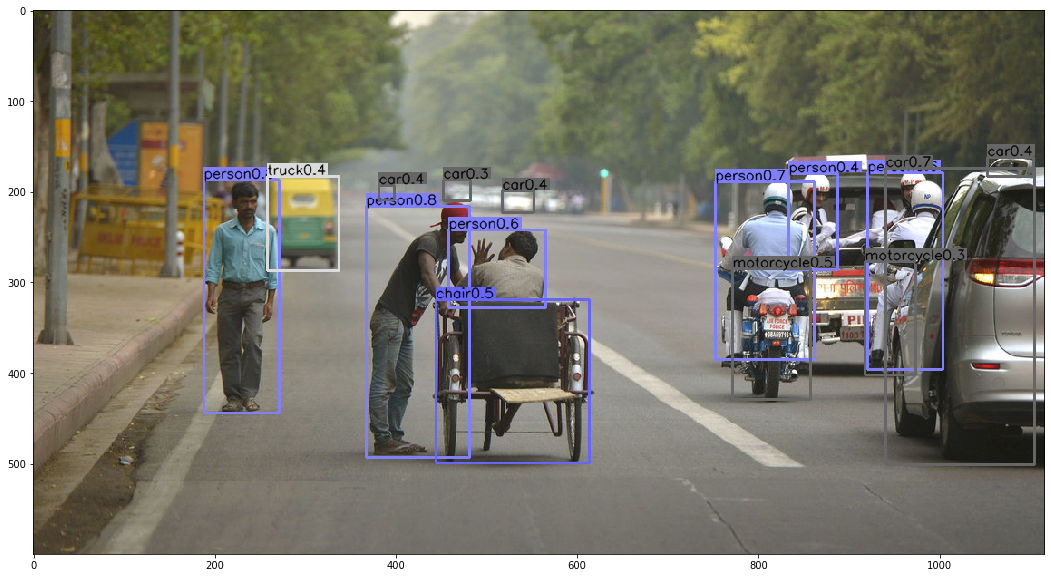

In [5]:
ret = detector.run(img)